In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pyplot
from reimporter import *
import ptvsd
ptvsd.enable_attach()
freeze_modules()

In [2]:
data = pd.read_csv("./heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
CATEGORICAL_DATA = {"Sex", 'ChestPainType', "RestingECG", "ExcersiveAngina", "ST_Slope"}
NUMERICAL_DATA  = {"Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"}
data = pd.get_dummies(data)
for col in NUMERICAL_DATA: 
    data[col] = data[col]/data[col].abs().max()
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.519481,0.70,0.479270,0,0.851485,0.000000,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,0.636364,0.80,0.298507,0,0.772277,0.161290,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0.480519,0.65,0.469320,0,0.485149,0.000000,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,0.623377,0.69,0.354892,0,0.534653,0.241935,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,0.701299,0.75,0.323383,0,0.603960,0.000000,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.584416,0.55,0.437811,0,0.653465,0.193548,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,0.883117,0.72,0.320066,1,0.698020,0.548387,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,0.740260,0.65,0.217247,0,0.569307,0.193548,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,0.740260,0.65,0.391376,0,0.861386,0.000000,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [4]:
reimport()
from sklearn.model_selection import train_test_split
from data_loader import DataLoader
data = data.to_numpy()
labels = data[:, -1]
features = data[:, :-1]
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=.2)
train_loader = DataLoader(train_data, train_labels)
test_loader = DataLoader(test_data, test_labels)

In [18]:
reimport()
from neural_network import NeuralNetwork
from loss_and_activations import *
layer_sizes = [25, 50, 1]
activations = [Relu, Relu, Sigmoid]
nn = NeuralNetwork(len(features[0]), layer_sizes, activations)

In [19]:
reimport()
from nn_trainer import NNTrainer
from loss_and_activations import BCE
loss_func = BCE()
trainer = NNTrainer("testing", nn, train_loader, test_loader)

In [20]:
trainer.train(100, 20, .001, loss_func, lr_scheduling=True, lr_step_inc=.1, lr_step_size=10)

Epoch: 0, train_loss: 67.96194967107549 test_loss: 35.02687569496385, train_acc: 0.7425068119891008, test_acc: 0.7717391304347826
Epoch: 1, train_loss: 40.903846954035245 test_loss: 24.115425435526657, train_acc: 0.8283378746594006, test_acc: 0.8043478260869565
Epoch: 2, train_loss: 35.57866443349045 test_loss: 58.272908384309105, train_acc: 0.8433242506811989, test_acc: 0.8152173913043478
Epoch: 3, train_loss: 35.34244955034512 test_loss: 49.315138917729016, train_acc: 0.8433242506811989, test_acc: 0.8152173913043478
Epoch: 4, train_loss: 32.427247067570924 test_loss: 59.105786240456425, train_acc: 0.8460490463215259, test_acc: 0.8152173913043478
Epoch: 5, train_loss: 30.17970026306256 test_loss: 62.2515932730226, train_acc: 0.8555858310626703, test_acc: 0.8369565217391305
Epoch: 6, train_loss: 29.22063321712544 test_loss: 60.45816073702191, train_acc: 0.8637602179836512, test_acc: 0.8478260869565217
Epoch: 7, train_loss: 28.017729569136232 test_loss: 61.45056068003532, train_acc: 0.8

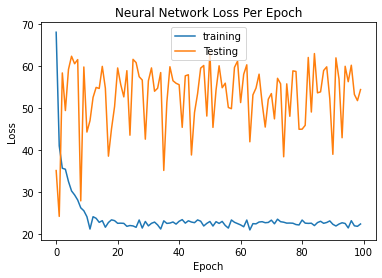

In [21]:
trainer.plot_loss()

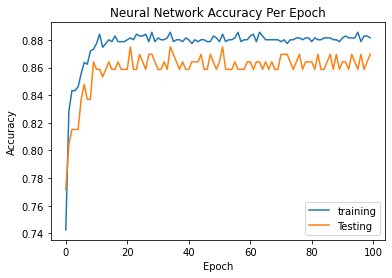

In [22]:
trainer.plot_acc()